## SUMMARY STATTISTICS

In [17]:
# summary of co
import pandas as pd
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_co=df[df.parameter=='co'].value.agg(['min','mean','median','max'])
print('Summary statistics for co pollutant :\n', summary_co)

Summary statistics for co pollutant :
 min           0.003500
mean        118.418556
median        0.240000
max       10000.000000
Name: value, dtype: float64


In [18]:
df.info('parameter')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8842 non-null   int64  
 1   location_id    8842 non-null   int64  
 2   location_name  8842 non-null   object 
 3   parameter      8842 non-null   object 
 4   value          8842 non-null   float64
 5   unit           8842 non-null   object 
 6   datetimeUtc    8842 non-null   object 
 7   datetimeLocal  8842 non-null   object 
 8   timezone       8842 non-null   object 
 9   latitude       8842 non-null   float64
 10  longitude      8842 non-null   float64
 11  country_iso    8842 non-null   float64
 12  isMobile       8842 non-null   float64
 13  isMonitor      8842 non-null   float64
 14  owner_name     8842 non-null   object 
 15  provider       8842 non-null   object 
dtypes: float64(6), int64(2), object(8)
memory usage: 1.1+ MB


In [19]:
# summary of pm10
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_pm10=df[df.parameter=='pm10'].value.agg(['min','mean','median','max'])
print('Summary statistics for pm10 pollutant :\n', summary_pm10)

Summary statistics for pm10 pollutant :
 min           1.000000
mean        140.747123
median       23.000000
max       10000.000000
Name: value, dtype: float64


In [20]:
# summary for pm25
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_pm25=df[df.parameter=='pm25'].value.agg(['min','mean','median','max'])
print('Summary statistics for pm25 pollutant :\n', summary_pm25)

Summary statistics for pm25 pollutant :
 min           0.017000
mean        226.765556
median       10.000000
max       10000.000000
Name: value, dtype: float64


## Plotting a time series

   Unnamed: 0  location_id location_name parameter  value unit  \
0           0      2622871           군위읍        co   0.27  ppm   
1           1      2622871           군위읍        co   0.27  ppm   
2           2      2622871           군위읍        co   0.26  ppm   
3           3      2622871           군위읍        co   0.25  ppm   
4           4      2622871           군위읍        co   0.25  ppm   

                 datetimeUtc              datetimeLocal    timezone  \
0  2024-03-19T23:00:00+00:00  2024-03-20T08:00:00+09:00  Asia/Seoul   
1  2024-03-20T00:00:00+00:00  2024-03-20T09:00:00+09:00  Asia/Seoul   
2  2024-03-20T01:00:00+00:00  2024-03-20T10:00:00+09:00  Asia/Seoul   
3  2024-03-20T02:00:00+00:00  2024-03-20T11:00:00+09:00  Asia/Seoul   
4  2024-03-20T03:00:00+00:00  2024-03-20T12:00:00+09:00  Asia/Seoul   

    latitude  longitude  country_iso  isMobile  isMonitor  \
0  36.234746  128.57628       1000.0    2000.0     1000.0   
1  36.234746  128.57628       1000.0    2000.0     100

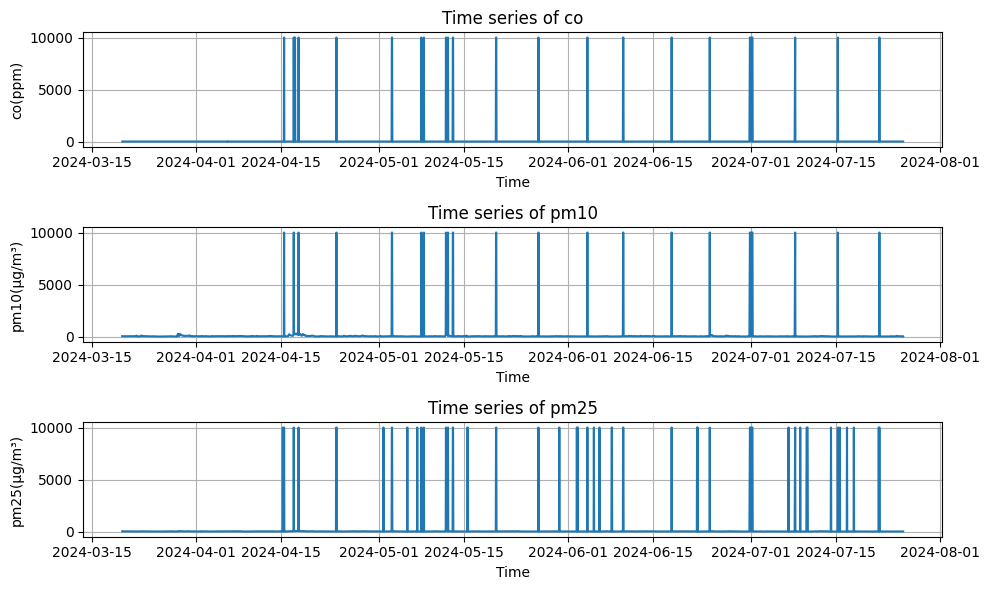

In [21]:
# import the library
import pandas as pd
import matplotlib.pyplot as plt

# read csv files
data = pd.read_csv('combined_Suchang_Dong.csv')
print(data.head())

# convert datetime column to datetime format
time=data['datetimeUtc'] = pd.to_datetime(data['datetimeUtc'])

# get unique pollutants
pollutants = data['parameter'].unique()

# set up the plot
plt.figure(figsize=(10,6))

# plot for each pollutant
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(len(pollutants),1,i)
    pollutant_dt = data[data['parameter']== pollutant]
    plt.plot(pollutant_dt['datetimeUtc'],pollutant_dt['value'])
    plt.title(f'Time series of {pollutant}')
    plt.xlabel('Time')
    plt.ylabel(f'{pollutant}({pollutant_dt["unit"].iloc[0]})')
    plt.grid(True)

plt.tight_layout()
plt.show()


   * this plot shows that pm25 is the highest pollutant due to how the time series is spaced

In [22]:
co= data['parameter']=='co'
co
#pm10= data['parameter'] == 'pm10'
#pm25= data['parameter']== 'pm25'

#co_v= data['value']=='co'
#print(co_v)
#pm10_v= data['value']=='pm10'
#pm25_v= data['value']=='pm25'



0        True
1        True
2        True
3        True
4        True
        ...  
8837    False
8838    False
8839    False
8840    False
8841    False
Name: parameter, Length: 8842, dtype: bool

## PLOTTING GRAPHS

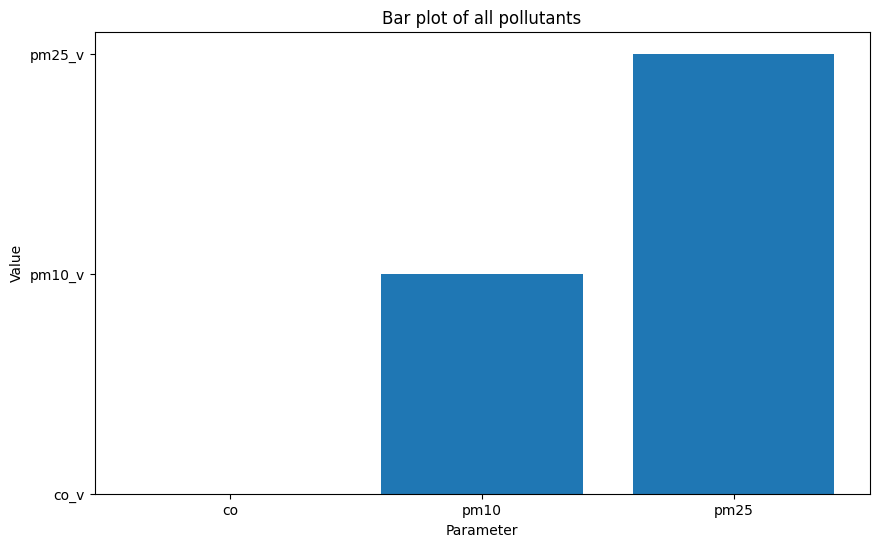

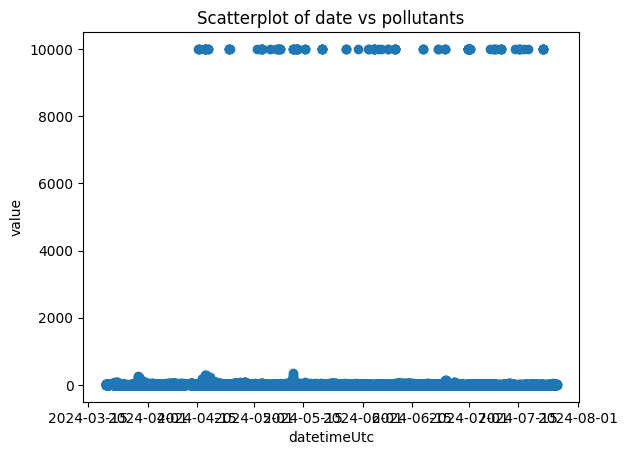

In [23]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#set the area
plt.figure(figsize=(10,6))

x= ['co','pm10','pm25']
y=['co_v','pm10_v','pm25_v']

# bar graph
plt.bar(x,y)
plt.title('Bar plot of all pollutants')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.show()

# scatter plot
plt.scatter(x=time,y=data['value'])
plt.title('Scatterplot of date vs pollutants')
plt.xlabel('datetimeUtc')
plt.ylabel('value')
plt.show()

<Axes: ylabel='Frequency'>

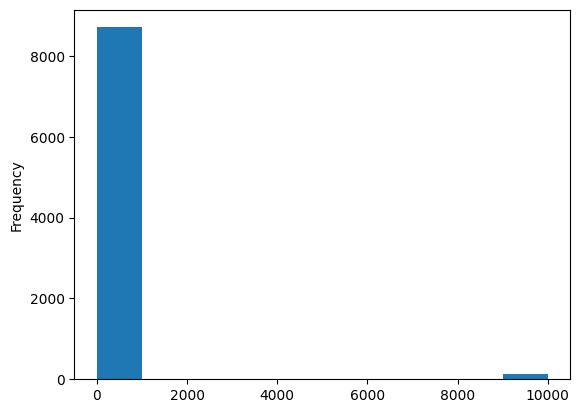

In [24]:
data['value'].plot(kind='hist')

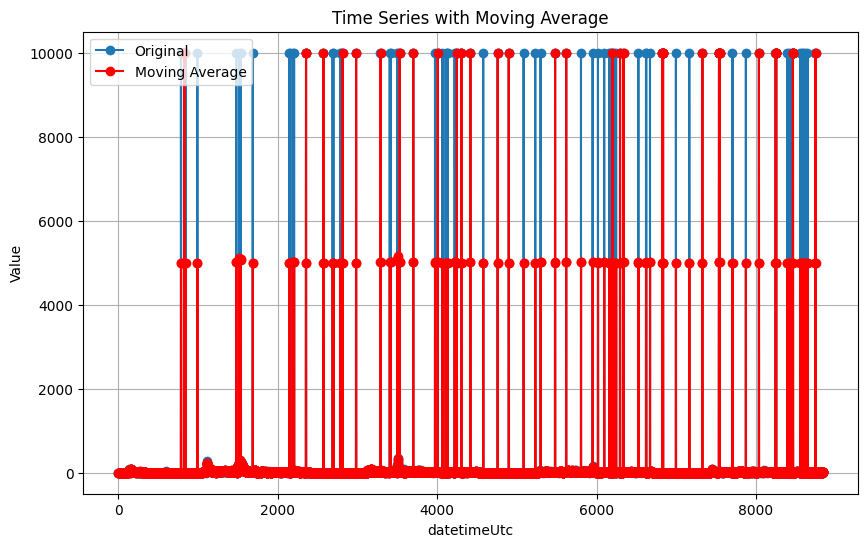

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and plot the moving average
data['moving_avg'] = data['value'].rolling(window=2).mean()
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-', label='Original')
plt.plot(data.index, data['moving_avg'], marker='o', color='red', linestyle='-', label='Moving Average')
plt.title('Time Series with Moving Average')
plt.xlabel('datetimeUtc')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Air Quality Index

In [85]:
# load dataset
data = pd.read_csv('combined_Suchang_Dong.csv')

# convert datetime column to datetime format
data['datetimeUtc'] = pd.to_datetime(data['datetimeUtc'])

# Define AQI breakpoints for various pollutants
aqi_breakepoints = {
    'pm25':[
        (0, 12, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ],
    'pm10':[
               (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 504, 301, 400),
        (505, 604, 401, 500),
 
    ],
    'co':[
       (0, 4.4, 0, 50),
        (4.5, 9.4, 51, 100),
        (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200),
        (15.5, 30.4, 201, 300),
        (30.5, 40.4, 301, 400),
        (40.5, 50.4, 401, 500), 
    ]
}

# Function to calculate AQI
def calculate_aqi(concentration, breakpoints):
    for (c_low, c_high, aqi_low, aqi_high) in breakpoints:
        if c_low <= concentration <= c_high:
            return ((aqi_high - aqi_low) / (c_high - c_low)) * (concentration - c_low) + aqi_low
    return None

# Apply the AQI calculation
def get_aqi(row):
    pollutant = row['parameter']
    concentration = row['value']
    if pollutant in aqi_breakepoints:
        return calculate_aqi(concentration, aqi_breakepoints[pollutant])
    return None

data['AQI'] = data.apply(get_aqi, axis=1)

# Display the updated dataset with AQI values
data.head()

,Unnamed: 0,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider,AQI
0,0,2622871,군위읍,co,0.27,ppm,2024-03-19 23:00:00+00:00,2024-03-20T08:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,3.068182
1,1,2622871,군위읍,co,0.27,ppm,2024-03-20 00:00:00+00:00,2024-03-20T09:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,3.068182
2,2,2622871,군위읍,co,0.26,ppm,2024-03-20 01:00:00+00:00,2024-03-20T10:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.954545
3,3,2622871,군위읍,co,0.25,ppm,2024-03-20 02:00:00+00:00,2024-03-20T11:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.840909
4,4,2622871,군위읍,co,0.25,ppm,2024-03-20 03:00:00+00:00,2024-03-20T12:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.840909
